In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("../adult.csv")
df = df[["age", "race", "sex", "income"]]
df

,age,race,sex,income
0,90,White,Female,<=50K
1,82,White,Female,<=50K
2,66,Black,Female,<=50K
3,54,White,Female,<=50K
4,41,White,Female,<=50K
...,...,...,...,...
32556,22,White,Male,<=50K
32557,27,White,Female,<=50K
32558,40,White,Male,>50K
32559,58,White,Female,<=50K


In [9]:
df.to_csv("adult_age_race_sex_income.csv", index=False)

In [7]:
len(df[df["age"].between(20, 30)])

8915

In [8]:
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [9]:
len(df[(df["sex"] == "Female") & (df["income"] == ">50K")])

1179

In [10]:
with open("log_ds.txt") as f:
    lines = f.readlines()
    encryption_time_list_ds = [float(x) for x in lines[0].split(",")]
    upload_time_list_ds = [float(x) for x in lines[1].split(",")]
    query1_time_list_ds = [float(x) for x in lines[2].split(",")]
    query2_time_list_ds = [float(x) for x in lines[3].split(",")]
    query3_time_list_ds = [float(x) for x in lines[4].split(",")]

In [11]:
with open("log_no_dp.txt") as f:
    lines = f.readlines()
    query1_time_list_no_dp = [float(x) for x in lines[0].split(",")]
    query2_time_list_no_dp = [float(x) for x in lines[1].split(",")]
    query3_time_list_no_dp = [float(x) for x in lines[2].split(",")]

In [12]:
with open("log_dp.txt") as f:
    lines = f.readlines()
    query1_time_list_dp = [float(x) for x in lines[0].split(",")]
    query2_time_list_dp = [float(x) for x in lines[1].split(",")]
    query3_time_list_dp = [float(x) for x in lines[2].split(",")]

In [110]:
encryption_time_list_crypte = []
upload_time_list_crypte = []
query1_time_list_crypte = []
query2_time_list_crypte = []
query3_time_list_crypte = []
for i in range(10):
    with open(f"crypte_log/log{i+1}.txt") as f:
        lines = f.readlines()
        encryption_time_list_crypte.append(665003.4400429726)
        upload_time_list_crypte.append(float(lines[0].split()[-2]))
        query1_time_list_crypte.append(float(lines[1].split()[-2]))
        query2_time_list_crypte.append(float(lines[2].split()[-2]))
        query3_time_list_crypte.append(float(lines[3].split()[-2]))

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [114]:
data = []
for i in range(10):
    data.append(["Query 1", query1_time_list_no_dp[i], query1_time_list_dp[i], query1_time_list_ds[i], query1_time_list_crypte[i]])
    data.append(["Query 2", query2_time_list_no_dp[i], query2_time_list_dp[i], query2_time_list_ds[i], query2_time_list_crypte[i]])
    data.append(["Query 3", query3_time_list_no_dp[i], query3_time_list_dp[i], query3_time_list_ds[i], query3_time_list_crypte[i]])


In [115]:
labels = ["Standalone w/t DP", "Standalone w/ DP", "DS", "Crypte"]
df = pd.DataFrame(data=data, columns=["query"] + labels)
df

,query,Standalone w/t DP,Standalone w/ DP,DS,Crypte
0,Query 1,0.128220,0.278520,0.452327,486.651411
1,Query 2,0.177469,0.219316,0.443102,16.235351
2,Query 3,0.185183,0.172637,0.448601,103113.049622
3,Query 1,0.172396,0.207200,0.461461,525.754545
4,Query 2,0.174323,0.164619,0.446303,15.856839
5,Query 3,0.176526,0.204938,0.447249,103035.734320
6,Query 1,0.169666,0.158717,0.446083,514.326685
7,Query 2,0.129876,0.208071,0.444452,15.880371
8,Query 3,0.170346,0.201147,0.449761,102951.576287
9,Query 1,0.125356,0.204276,0.454759,523.402440


In [116]:
df = df.melt(id_vars="query", value_name="time")
df

,query,variable,time
0,Query 1,Standalone w/t DP,0.128220
1,Query 2,Standalone w/t DP,0.177469
2,Query 3,Standalone w/t DP,0.185183
3,Query 1,Standalone w/t DP,0.172396
4,Query 2,Standalone w/t DP,0.174323
...,...,...,...
115,Query 2,Crypte,15.922952
116,Query 3,Crypte,103093.342603
117,Query 1,Crypte,493.415410
118,Query 2,Crypte,15.853300


In [124]:
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", palette="colorblind", font="Times New Roman", font_scale=1.6)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# sns.set_palette("colorblind")
# sns.set(font="Times New Roman")

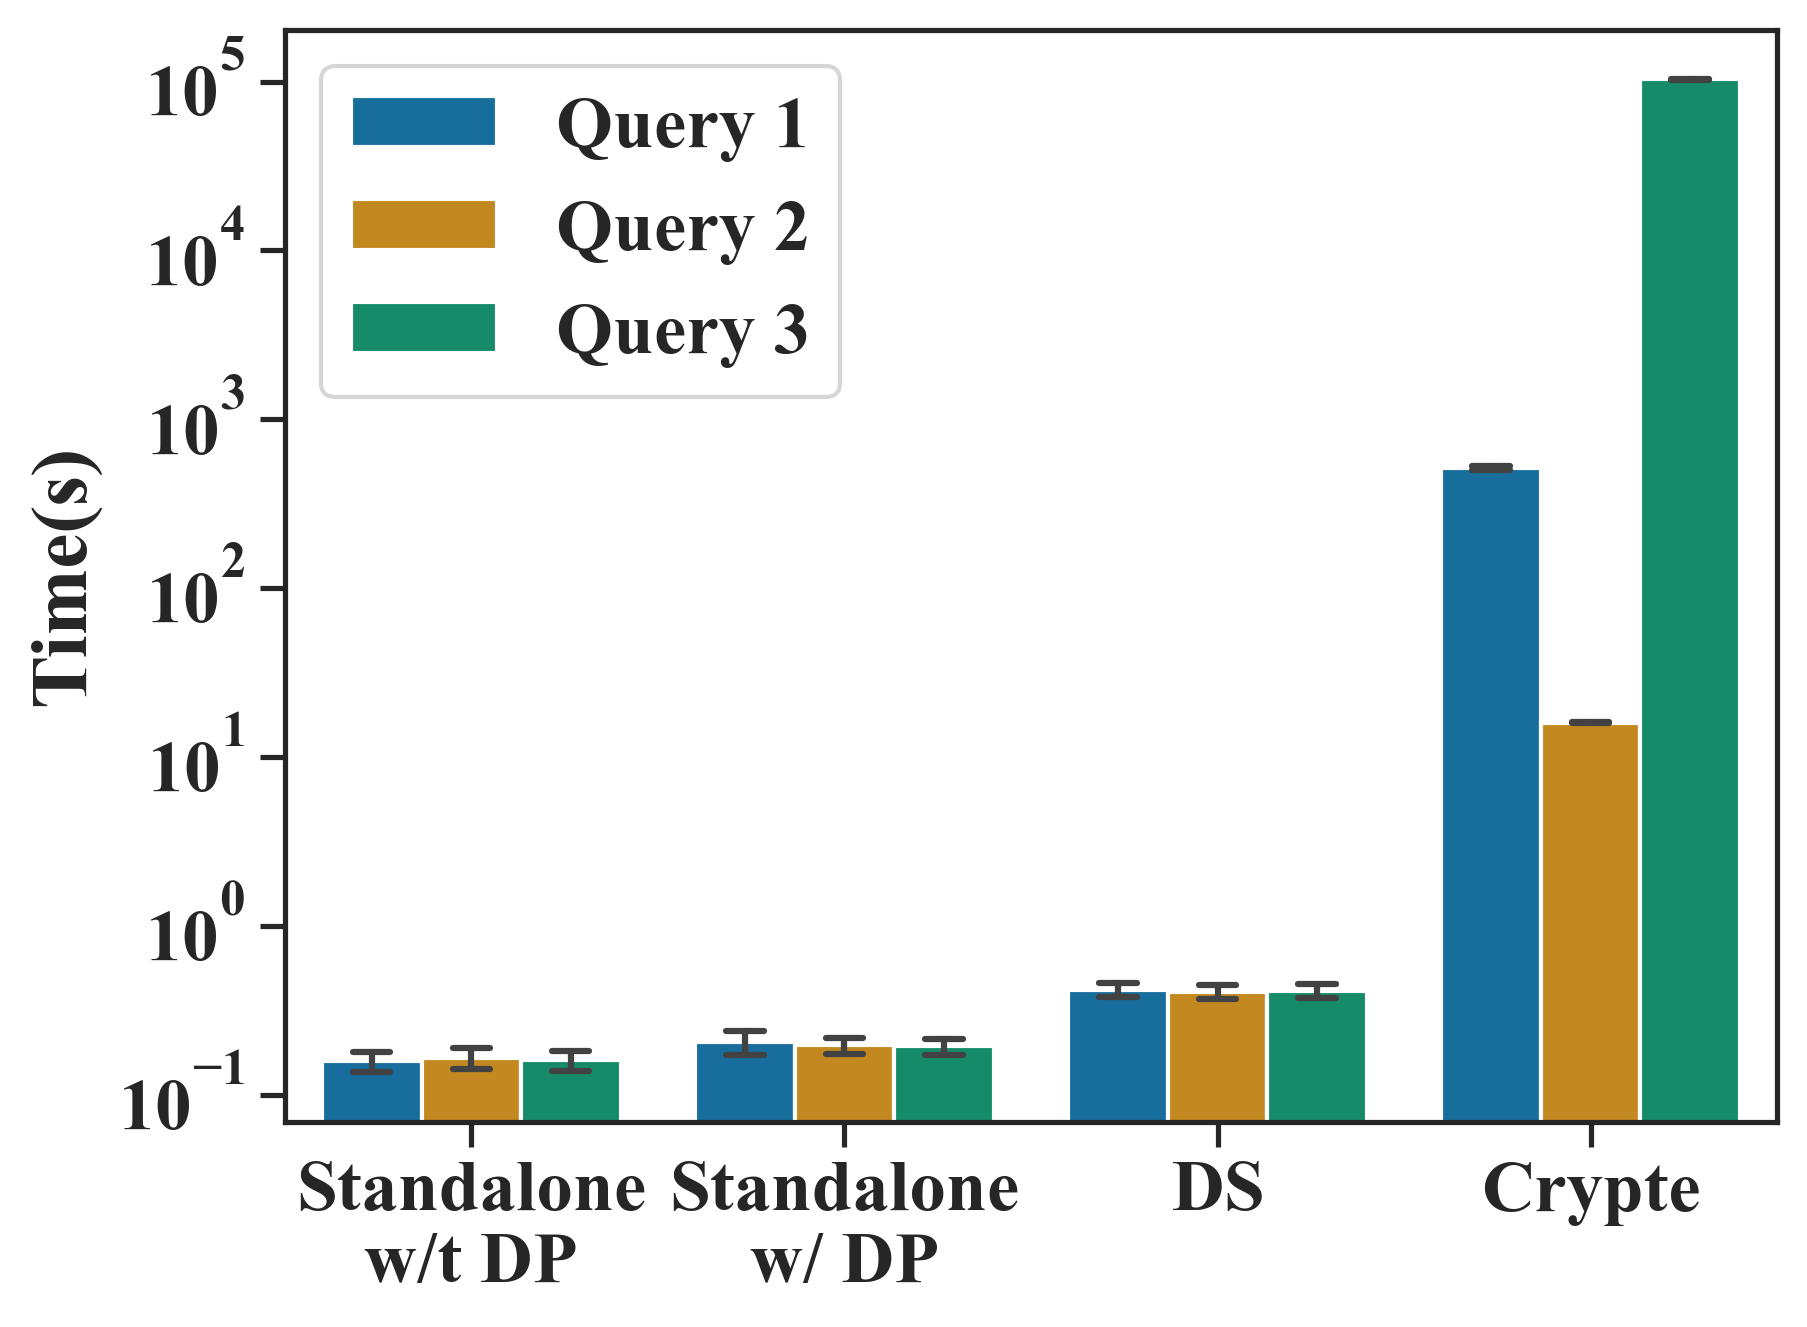

In [126]:
g = sns.barplot(data=df, x="variable", y="time", hue="query", errorbar="sd", capsize=0.1, errwidth=1.5)
g.set_yscale("log")
_ = g.set(xlabel=None, ylabel="Time(s)")
_ = g.set_yticks([0.1, 1, 10, 100, 1000, 10000, 100000])
_ = g.set_xticklabels(["Standalone\nw/t DP", "Standalone\nw/ DP", "DS", "Crypte"])
g.legend_.set_title(None)
plt.tight_layout()
plt.savefig("out1")
plt.show()
plt.close()

In [119]:
data2 = []
for i in range(10):
    data2.append(["DS", encryption_time_list_ds[i] + upload_time_list_ds[i]])
    data2.append(["Crypte", encryption_time_list_crypte[i] + upload_time_list_crypte[i]])

df2 = pd.DataFrame(data=data2, columns=["type", "time"])
df2

,type,time
0,DS,0.015738
1,Crypte,665112.443979
2,DS,0.014336
3,Crypte,665116.565115
4,DS,0.015274
5,Crypte,665119.484514
6,DS,0.015111
7,Crypte,665119.060374
8,DS,0.015447
9,Crypte,665121.568491


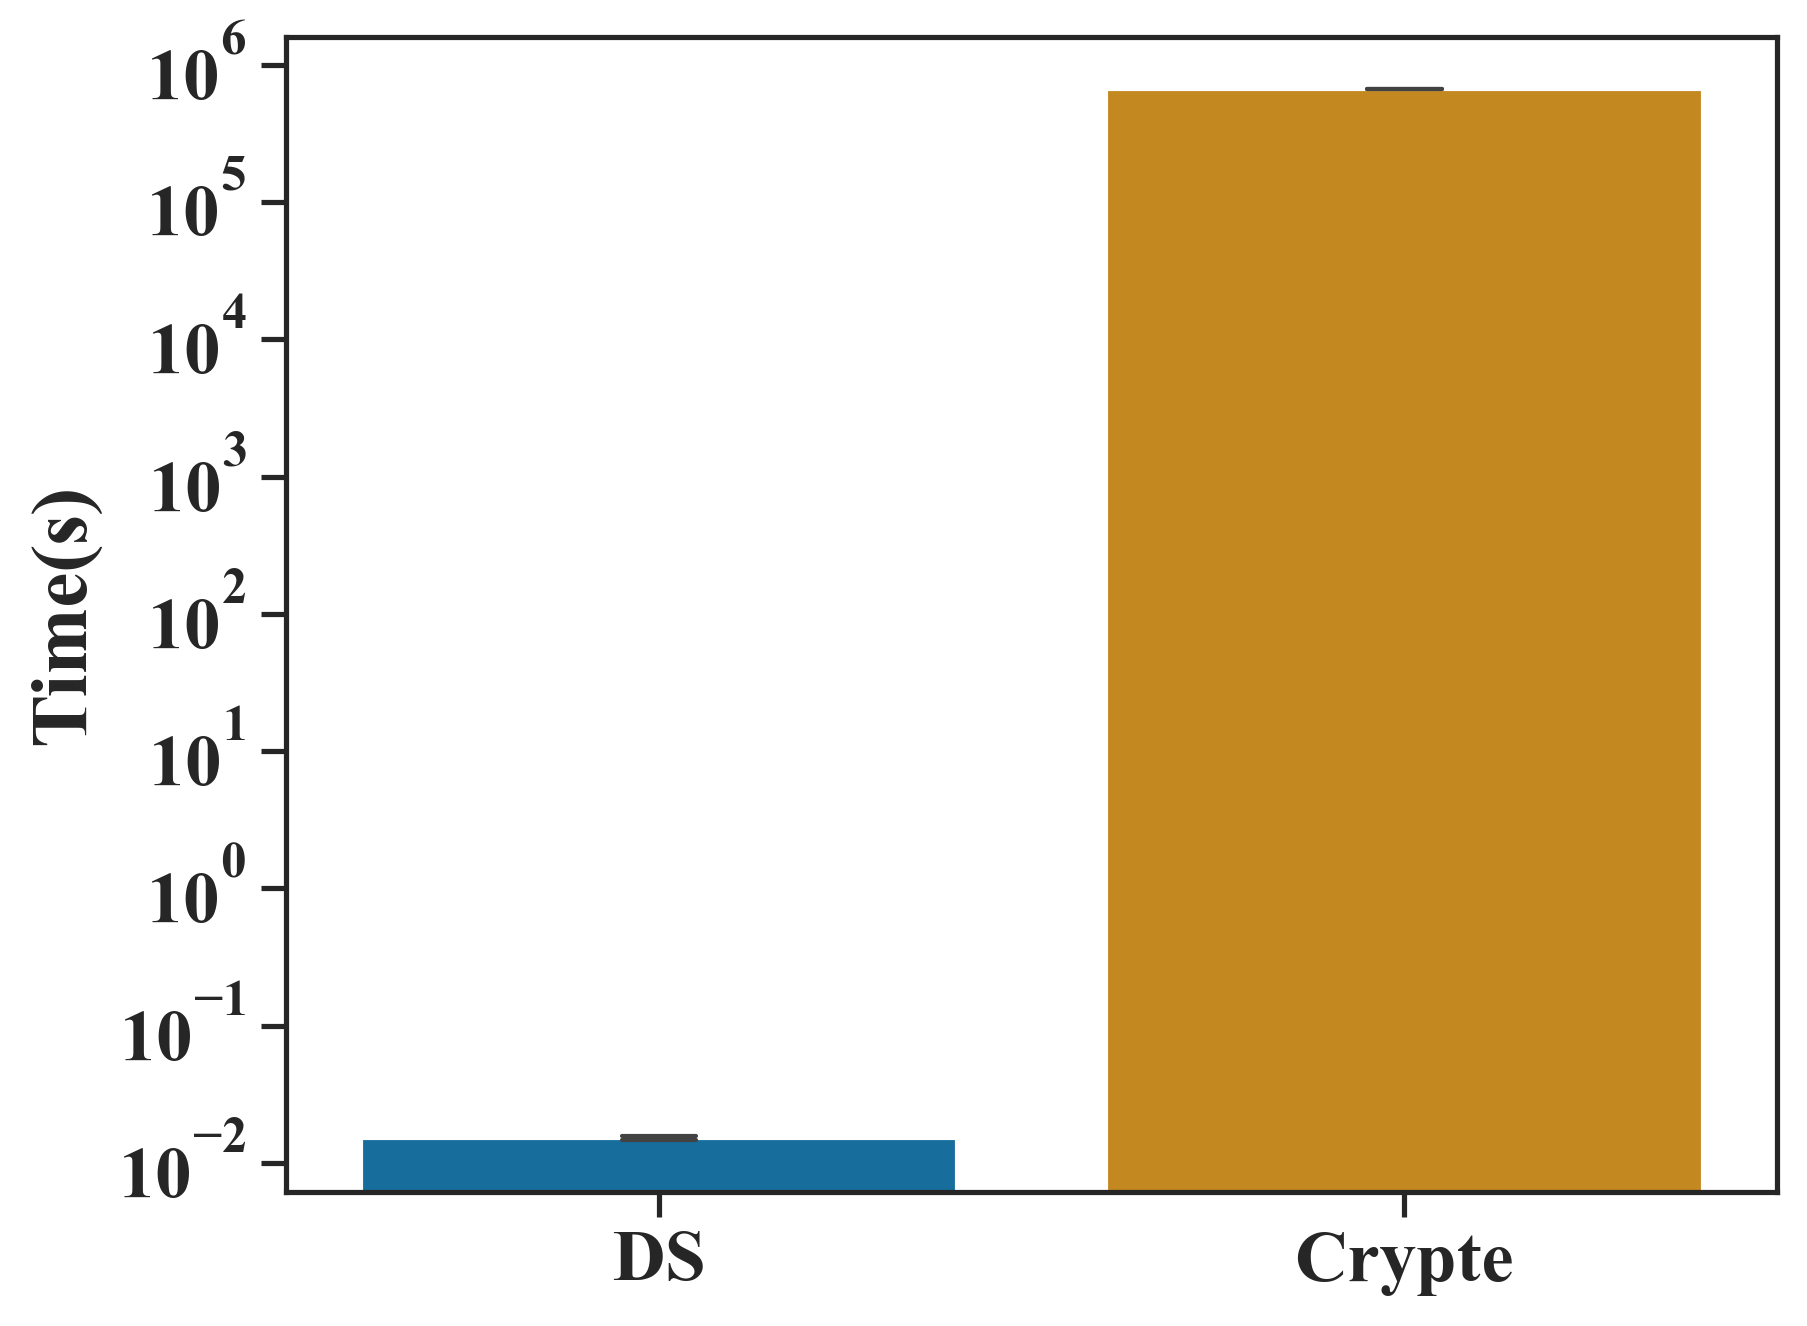

In [133]:
# sns.set_theme(style="white", palette="colorblind", font="Times New Roman", font_scale=1.5)
# ax = df2.plot(kind='bar', stacked=True)
ax = sns.barplot(data=df2, x="type", y="time", errorbar="sd", capsize=0.1, errwidth=1)
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
plt.yscale("log")
_ = ax.set_yticks([0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000])
_ = ax.set(xlabel=None, ylabel="Time(s)")
plt.tight_layout()
plt.savefig("out2")
plt.show()
plt.close()